# Load Training Data

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

colours = {
    'lsstu': '#9a0eea', 
    'lsstg': '#75bbfd', 
    'lsstr': '#76ff7b',
    'lssti': '#fdde6c', 
    'lsstz': '#f97306', 
    'lssty': '#e50000'
}

# Central passbands wavelengths
pb_wavelengths = {"lsstu": 3685., "lsstg": 4802., "lsstr": 6231.,
                  "lssti": 7542., "lsstz": 8690., "lssty": 9736.}


In [4]:
data = pd.read_csv("../data/plasticc/training_set.csv", sep=',')
data.shape

(1421705, 6)

In [5]:
data.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [6]:
def remap_filters(df):  # maybe not in snmachine (raise issue/channel)
    """Function to remap integer filters to the corresponding lsst filters and
    also to set filter name syntax to what snmachine already recognizes

    df: pandas.dataframe
        Dataframe of lightcurve observations
    """
    df.rename({'passband': 'filter'}, axis='columns', inplace=True)
    filter_replace = {0: 'lsstu', 1: 'lsstg', 2: 'lsstr', 3: 'lssti',
                      4: 'lsstz', 5: 'lssty'}
    df['filter'].replace(to_replace=filter_replace, inplace=True)
    return df

In [7]:
data = remap_filters(df=data)
data.rename({'flux_err': 'flux_error'}, axis='columns', inplace=True)  # snmachine and PLAsTiCC uses a different denomination
data.head()

,object_id,mjd,filter,flux,flux_error,detected
0,615,59750.4229,lsstr,-544.810303,3.622952,1
1,615,59750.4306,lsstg,-816.434326,5.553370,1
2,615,59750.4383,lssti,-471.385529,3.801213,1
3,615,59750.4450,lsstz,-388.984985,11.395031,1
4,615,59752.4070,lsstr,-681.858887,4.041204,1


In [8]:
filters = data['filter']
filters = list(np.unique(filters))
filters

['lsstg', 'lssti', 'lsstr', 'lsstu', 'lssty', 'lsstz']

In [9]:
# def filter_dataframe_only_supernova(object_list_filename, dataframe):

#     plasticc_object_list = np.genfromtxt(object_list_filename, dtype='U')
#     print(len(plasticc_object_list))
#     print(dataframe.shape)
#     filtered_dataframe = dataframe[dataframe['object_id'].isin(plasticc_object_list)]
#     return filtered_dataframe

In [10]:
df = data
df.shape

(1421705, 6)

In [11]:
# df = filter_dataframe_only_supernova("../data/plasticc/train_subset.txt", data)
# df.shape

In [12]:
df.head()

,object_id,mjd,filter,flux,flux_error,detected
0,615,59750.4229,lsstr,-544.810303,3.622952,1
1,615,59750.4306,lsstg,-816.434326,5.553370,1
2,615,59750.4383,lssti,-471.385529,3.801213,1
3,615,59750.4450,lsstz,-388.984985,11.395031,1
4,615,59752.4070,lsstr,-681.858887,4.041204,1


In [13]:
object_list = list(np.unique(df['object_id']))
object_list[102]

17172

In [14]:
object_list = object_list[:10]
object_list

[615, 713, 730, 745, 1124, 1227, 1598, 1632, 1920, 1926]

In [15]:
def transient_trim(object_list, df):
    adf = pd.DataFrame(data=[], columns=df.columns)
    for obj in object_list:
        obs = df[df['object_id'] == obj]
        obs_time = obs['mjd']
        obs_detected_time = obs_time[obs['detected']==1]
        is_obs_transient = (obs_time > obs_detected_time.iat[0] - 50) & (obs_time < obs_detected_time.iat[-1] + 50)
        obs_transient = obs[is_obs_transient]
        obs_transient['mjd'] -= min(obs_transient['mjd']) # so all transients start at time 0
        adf = np.vstack((adf, obs_transient))
        
    obs_transient = pd.DataFrame(data=adf, columns=obs_transient.columns)
        
    return obs_transient

In [16]:
obs_transient = transient_trim(object_list, df)
obs_transient.head()

/usr/local/anaconda3/envs/astronet/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/anaconda3/envs/astronet/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/anaconda3/envs/astronet/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,object_id,mjd,filter,flux,flux_error,detected
0,615,0,lsstr,-544.81,3.62295,1
1,615,0.0077,lsstg,-816.434,5.55337,1
2,615,0.0154,lssti,-471.386,3.80121,1
3,615,0.0221,lsstz,-388.985,11.395,1
4,615,1.9841,lsstr,-681.859,4.0412,1


In [17]:
len(np.unique(obs_transient['object_id']))

10

# Plot transformed light curve data

In [18]:
def plot_object(object_name, df, filters):
    for passband in filters:
        data = df[df['object_id'] == object_name]
        data = data[data['filter'] == passband]
        plt.errorbar(x=data['mjd'], y=data['flux'], yerr=data['flux_error'], 
                     linestyle='none', 
                     marker='o', 
                     color=colours[passband]
                    )

#### Before

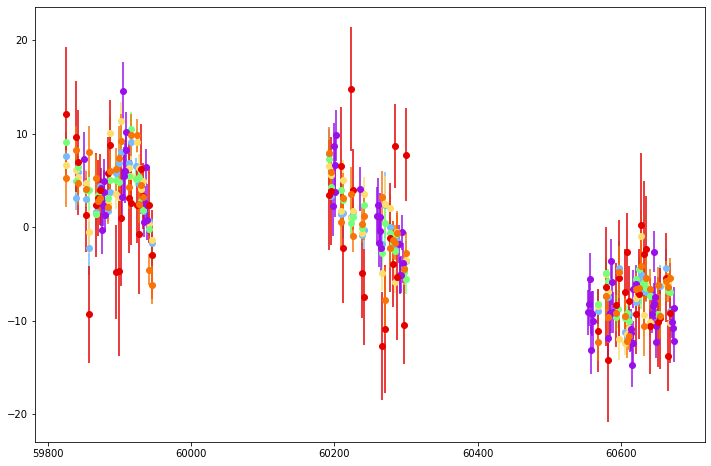

In [19]:
plot_object(713, data, filters)

#### After

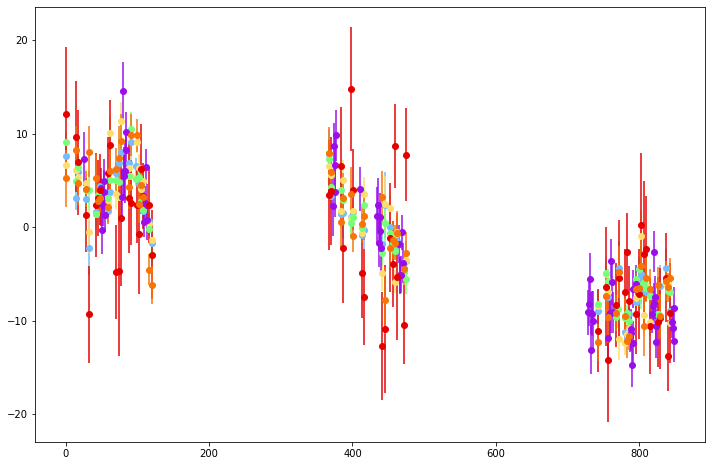

In [20]:
plot_object(713, obs_transient, filters)

# Fit Gaussian Process to new light curves

In [21]:
import george
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
import scipy.optimize as op
from functools import partial


def fit_2d_gp(obj_data, return_kernel=False, **kwargs):
    """Fit a 2D Gaussian process.

    If required, predict the GP at evenly spaced points along a light curve.

    Parameters
    ----------
    obj_data : pandas.core.frame.DataFrame or astropy.table.Table
        Time, flux and flux error of the data (specific filter of an object).
    return_kernel : Bool, default = False
        Whether to return the used kernel.
    kwargs : dict
        Additional keyword arguments that are ignored at the moment. We allow
        additional keyword arguments so that the various functions that
        call this one can be called with the same arguments.

    Returns
    -------
    kernel: george.gp.GP.kernel, optional
        The kernel used to fit the GP.
    gp_predict : functools.partial of george.gp.GP
        The GP instance that was used to fit the object.
    """
    guess_length_scale = 20.0  # a parameter of the Matern32Kernel

    #obj_data = preprocess_obs(obj_data, **kwargs)  # preprocess obs

    obj_times = obj_data.mjd.astype(float)
    obj_flux = obj_data.flux.astype(float)
    obj_flux_error = obj_data.flux_error.astype(float)
    obj_wavelengths = obj_data['filter'].map(pb_wavelengths)

    def neg_log_like(p):  # Objective function: negative log-likelihood
        gp.set_parameter_vector(p)
        loglike = gp.log_likelihood(obj_flux, quiet=True)
        return -loglike if np.isfinite(loglike) else 1e25

    def grad_neg_log_like(p):  # Gradient of the objective function.
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(obj_flux, quiet=True)

    # Use the highest signal-to-noise observation to estimate the scale. We
    # include an error floor so that in the case of very high
    # signal-to-noise observations we pick the maximum flux value.
    signal_to_noises = np.abs(obj_flux) / np.sqrt(
        obj_flux_error ** 2 + (1e-2 * np.max(obj_flux)) ** 2
    )
    scale = np.abs(obj_flux[signal_to_noises.idxmax()])

    kernel = (0.5 * scale) ** 2 * george.kernels.Matern32Kernel([
        guess_length_scale ** 2, 6000 ** 2], ndim=2)
    kernel.freeze_parameter("k2:metric:log_M_1_1")

    gp = george.GP(kernel)
    default_gp_param = gp.get_parameter_vector()
    x_data = np.vstack([obj_times, obj_wavelengths]).T
    gp.compute(x_data, obj_flux_error)

    bounds = [(0, np.log(1000 ** 2))]
    bounds = [(default_gp_param[0] - 10, default_gp_param[0] + 10)] + bounds
    results = op.minimize(neg_log_like, gp.get_parameter_vector(),
                          jac=grad_neg_log_like, method="L-BFGS-B",
                          bounds=bounds, tol=1e-6)

    if results.success:
        gp.set_parameter_vector(results.x)
    else:
        # Fit failed. Print out a warning, and use the initial guesses for fit
        # parameters.
        obj = obj_data['object_id'][0]
        print("GP fit failed for {}! Using guessed GP parameters.".format(obj))
        gp.set_parameter_vector(default_gp_param)

    gp_predict = partial(gp.predict, obj_flux)

    if return_kernel:
        return kernel, gp_predict
    else:
        return gp_predict


def predict_2d_gp(gp_predict, gp_times, gp_wavelengths):
    """Outputs the predictions of a Gaussian Process.

    Parameters
    ----------
    gp_predict : functools.partial of george.gp.GP
        The GP instance that was used to fit the object.
    gp_times : numpy.ndarray
        Times to evaluate the Gaussian Process at.
    gp_wavelengths : numpy.ndarray
        Wavelengths to evaluate the Gaussian Process at.

    Returns
    -------
    obj_gps : pandas.core.frame.DataFrame, optional
        Time, flux and flux error of the fitted Gaussian Process.
    """
    unique_wavelengths = np.unique(gp_wavelengths)
    number_gp = len(gp_times)
    obj_gps = []
    for wavelength in unique_wavelengths:
        gp_wavelengths = np.ones(number_gp) * wavelength
        pred_x_data = np.vstack([gp_times, gp_wavelengths]).T
        pb_pred, pb_pred_var = gp_predict(pred_x_data, return_var=True)
        # stack the GP results in a array momentarily
        obj_gp_pb_array = np.column_stack((gp_times, pb_pred, np.sqrt(pb_pred_var)))
        obj_gp_pb = Table(
            [
                obj_gp_pb_array[:, 0],
                obj_gp_pb_array[:, 1],
                obj_gp_pb_array[:, 2],
                [wavelength] * number_gp,
            ],
            names=["mjd", "flux", "flux_error", "filter"],
        )
        if len(obj_gps) == 0:  # initialize the table for 1st passband
            obj_gps = obj_gp_pb
        else:  # add more entries to the table
            obj_gps = vstack((obj_gps, obj_gp_pb))
            
    obj_gps = obj_gps.to_pandas()
    return obj_gps

## Demo a single object #33191

In [91]:
obs_transient_single = obs_transient[obs_transient['object_id'] == 1926]
obs_transient_single.head()

,object_id,mjd,filter,flux,flux_error,detected
1530,1926,0,lsstu,3.95886,2.82413,0
1531,1926,0.9127,lsstu,0.466958,2.50636,0
1532,1926,1.915,lsstu,-0.544849,2.52646,0
1533,1926,2.9081,lsstu,-1.98309,2.86273,0
1534,1926,3.9089,lsstu,-7.06129,3.26184,0


In [92]:
gp_predict = fit_2d_gp(obs_transient_single)

In [93]:
number_gp = 100

In [94]:
gp_times = np.linspace(min(obs_transient_single['mjd']), max(obs_transient_single['mjd']), number_gp)
gp_times.shape

(100,)

In [95]:
gp_wavelengths = np.vectorize(pb_wavelengths.get)(filters)
gp_wavelengths.shape

(6,)

In [96]:
obj_gps = predict_2d_gp(gp_predict, gp_times, gp_wavelengths)

In [97]:
inverse_pb_wavelengths = {v: k for k, v in pb_wavelengths.items()}

In [98]:
obj_gps['filter'] = obj_gps['filter'].map(inverse_pb_wavelengths)
obj_gps.head()

,mjd,flux,flux_error,filter
0,0.000000,2.399572,2.013764,lsstu
1,5.026880,-3.900630,2.690589,lsstu
2,10.053760,-2.582418,5.246158,lsstu
3,15.080639,-3.469920,8.197209,lsstu
4,20.107519,-2.770464,11.644872,lsstu


In [99]:
# Central passbands wavelengths
pb_wavelengths = {"lsstu": 3685., "lsstg": 4802., "lsstr": 6231.,
                  "lssti": 7542., "lsstz": 8690., "lssty": 9736.}


In [100]:
pb_colors = {'lsstu':'#984ea3', 'lsstg':'#4daf4a', 'lsstr':'#e41a1c', 
             'lssti':'#377eb8', 'lsstz':'#ff7f00', 'lssty':'#e3c530'} # colours for the plot

def plot_real_data_and_model(obj_data, obj_model=None, number_col=2, 
                             show_title=False, show_legend=True):
    f, ax = plt.subplots()

    """Plots real data and model fluxes at the corresponding mjd"""
    passbands = np.unique(obj_data['filter'])
    passbands = ['lsstu', 'lsstg', 'lsstr', 'lssti', 'lsstz', 'lssty']
    for pb in passbands:
        obj_data_pb = obj_data[obj_data['filter'] == pb] # obj LC in that passband
        if obj_model is not None:
            obj_model_pb = obj_model[obj_model['filter'] == pb]
            model_flux = obj_model_pb['flux']
            ax.plot(obj_model_pb['mjd'], model_flux, color=pb_colors[pb], alpha=.7, label='')
            try:
                model_flux_error = obj_model_pb['flux_error']
                ax.fill_between(x=obj_model_pb['mjd'], y1=model_flux-model_flux_error, 
                                 y2=model_flux+model_flux_error, color=pb_colors[pb], alpha=.15, label=None)
            except:
                pass
        ax.errorbar(obj_data_pb['mjd'], obj_data_pb['flux'], obj_data_pb['flux_error'], 
                     fmt='o', color=pb_colors[pb], label=pb[-1])
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Flux units')
    if show_title:
        ax.title('Object ID: {}\nPhoto-z = {:.3f}'.format(obj_data.meta['name'], obj_data.meta['z']))
    if show_legend:
        ax.legend(ncol=number_col, handletextpad=.3, borderaxespad=.3, 
                   labelspacing=.2, borderpad=.3, columnspacing=.4)
        
    return ax

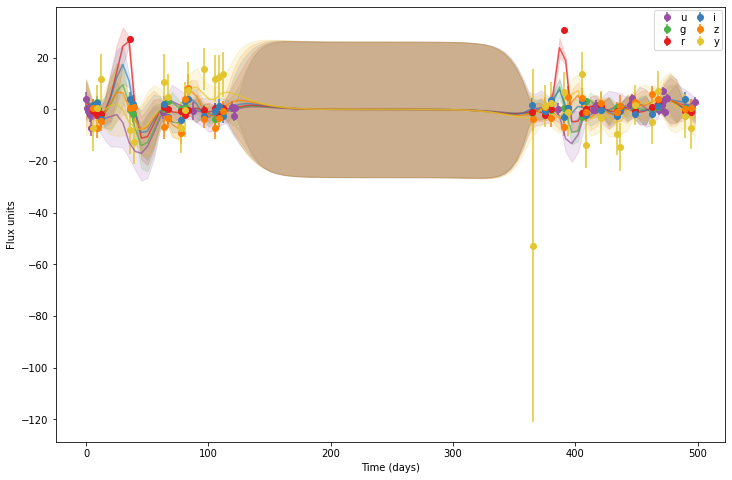

In [101]:
ax = plot_real_data_and_model(obs_transient_single, obj_model=obj_gps)

# Create dataset

In [36]:
obs_transient.head()

,object_id,mjd,filter,flux,flux_error,detected
0,615,0,lsstr,-544.81,3.62295,1
1,615,0.0077,lsstg,-816.434,5.55337,1
2,615,0.0154,lssti,-471.386,3.80121,1
3,615,0.0221,lsstz,-388.985,11.395,1
4,615,1.9841,lsstr,-681.859,4.0412,1


In [37]:
def generate_gp_all_objects(object_list, obs_transient):
    adf = pd.DataFrame(data=[], columns=['mjd', 'lsstg', 'lssti', 'lsstr', 'lsstu', 'lssty', 'lsstz', 'object_id'])
    for object_id in object_list:
    
        df = obs_transient[obs_transient['object_id'] == object_id]
    
        gp_predict = fit_2d_gp(df)
    
        number_gp = 100
        gp_times = np.linspace(min(df['mjd']), max(df['mjd']), number_gp)
        obj_gps = predict_2d_gp(gp_predict, gp_times, gp_wavelengths)
        obj_gps['filter'] = obj_gps['filter'].map(inverse_pb_wavelengths)
    
        obj_gps = obj_gps.pivot(index='mjd', columns='filter', values='flux')
        obj_gps = obj_gps.reset_index()
        obj_gps['object_id'] = object_id
        adf = np.vstack((adf, obj_gps))  
    
    
    #obj_gps.head()
    #adf.shape
    return pd.DataFrame(data=adf, columns=obj_gps.columns)
    #pd.DataFrame(data=adf)

In [38]:
generated_gp_dataset = generate_gp_all_objects(object_list, obs_transient)
generated_gp_dataset['object_id'] = generated_gp_dataset['object_id'].astype(int)
generated_gp_dataset.head()

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,0,-814.732,-470.081,-544.982,-956.117,-319.461,-388.216,615
1,8.82616,-128.567,-110.48,-120.279,-132.62,-91.9001,-100.917,615
2,17.6523,-841.637,-501.648,-624.017,-962.127,-438.19,-446.452,615
3,26.4785,-580.554,-430.941,-504.458,-618.868,-337.093,-376.44,615
4,35.3047,-129.37,-115.541,-119.944,-137.871,-115.466,-114.916,615


In [39]:
generated_gp_dataset

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,0,-814.732,-470.081,-544.982,-956.117,-319.461,-388.216,615
1,8.82616,-128.567,-110.48,-120.279,-132.62,-91.9001,-100.917,615
2,17.6523,-841.637,-501.648,-624.017,-962.127,-438.19,-446.452,615
3,26.4785,-580.554,-430.941,-504.458,-618.868,-337.093,-376.44,615
4,35.3047,-129.37,-115.541,-119.944,-137.871,-115.466,-114.916,615
...,...,...,...,...,...,...,...,...
995,477.554,3.28324,3.75774,3.57735,3.01312,3.15514,3.66156,1926
996,482.58,2.27753,3.29259,2.6181,2.57409,1.28724,2.66195,1926
997,487.607,0.774683,2.94908,0.747418,1.93265,-0.950632,1.4896,1926
998,492.634,-0.159401,1.43327,-0.701065,1.79861,-2.76353,0.230889,1926


## Attach labels by merrging metadata

In [40]:
metadata_pd = pd.read_csv("../data/plasticc/training_set_metadata.csv", sep=',', index_col='object_id')
metadata_pd = metadata_pd.reset_index()
metadata_pd['object_id'] = metadata_pd['object_id'].astype(int)
# metadata_pd.index = metadata_pd.index.astype(int)
# metadata_pd['obj_id'] = metadata_pd.index  # it is useful to be able to call this column by name

In [41]:
metadata_pd.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [42]:
generated_gp_dataset.head()

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,0,-814.732,-470.081,-544.982,-956.117,-319.461,-388.216,615
1,8.82616,-128.567,-110.48,-120.279,-132.62,-91.9001,-100.917,615
2,17.6523,-841.637,-501.648,-624.017,-962.127,-438.19,-446.452,615
3,26.4785,-580.554,-430.941,-504.458,-618.868,-337.093,-376.44,615
4,35.3047,-129.37,-115.541,-119.944,-137.871,-115.466,-114.916,615


In [43]:
df_combi = generated_gp_dataset.merge(metadata_pd, on='object_id', how='left')
df_combi.head()

,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,0,-814.732,-470.081,-544.982,-956.117,-319.461,-388.216,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,8.82616,-128.567,-110.48,-120.279,-132.62,-91.9001,-100.917,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,17.6523,-841.637,-501.648,-624.017,-962.127,-438.19,-446.452,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,26.4785,-580.554,-430.941,-504.458,-618.868,-337.093,-376.44,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,35.3047,-129.37,-115.541,-119.944,-137.871,-115.466,-114.916,615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


In [44]:
df_combi_trimmed = df_combi.drop(columns=["ra", "decl", "gal_l", "gal_b", "ddf", "hostgal_specz", "hostgal_photoz", "hostgal_photoz_err", "distmod", "mwebv"])
df_combi_trimmed.head()

,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id,target
0,0,-814.732,-470.081,-544.982,-956.117,-319.461,-388.216,615,92
1,8.82616,-128.567,-110.48,-120.279,-132.62,-91.9001,-100.917,615,92
2,17.6523,-841.637,-501.648,-624.017,-962.127,-438.19,-446.452,615,92
3,26.4785,-580.554,-430.941,-504.458,-618.868,-337.093,-376.44,615,92
4,35.3047,-129.37,-115.541,-119.944,-137.871,-115.466,-114.916,615,92


In [45]:
pd.set_option('display.max_rows', 500)

In [46]:
df_combi_trimmed.head(450)

,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id,target
0,0,-814.732,-470.081,-544.982,-956.117,-319.461,-388.216,615,92
1,8.82616,-128.567,-110.48,-120.279,-132.62,-91.9001,-100.917,615,92
2,17.6523,-841.637,-501.648,-624.017,-962.127,-438.19,-446.452,615,92
3,26.4785,-580.554,-430.941,-504.458,-618.868,-337.093,-376.44,615,92
4,35.3047,-129.37,-115.541,-119.944,-137.871,-115.466,-114.916,615,92
5,44.1308,39.1167,175.731,121.117,-27.6075,212.452,202.886,615,92
6,52.957,-113.476,-140.06,-121.174,-116.344,-178.259,-161.03,615,92
7,61.7832,-962.219,-472.993,-670.626,-1119.08,-253.54,-340.026,615,92
8,70.6093,-3.63343,-5.51038,-3.71319,-6.06288,-7.36038,-6.81673,615,92
9,79.4355,-30.762,-30.2384,-29.6688,-32.5567,-33.712,-31.8125,615,92


## Plot and inspect the resulting data

In [47]:
def plot_single_object_gp_mean(df, object_id):
    df = df[df['object_id'] == object_id]
    print(object_id, df['target'].values[0])
    gp_mean_data = pd.DataFrame(data=df, columns=df.columns).drop(columns=['object_id', 'target'])
    gp_mean_data.set_index('mjd').plot();

1926 65


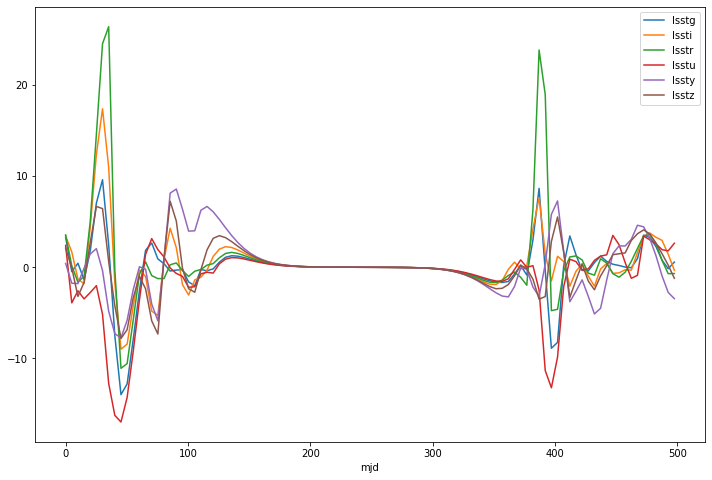

In [52]:
plot_single_object_gp_mean(df_combi_trimmed, random.choice(object_list))

713 88


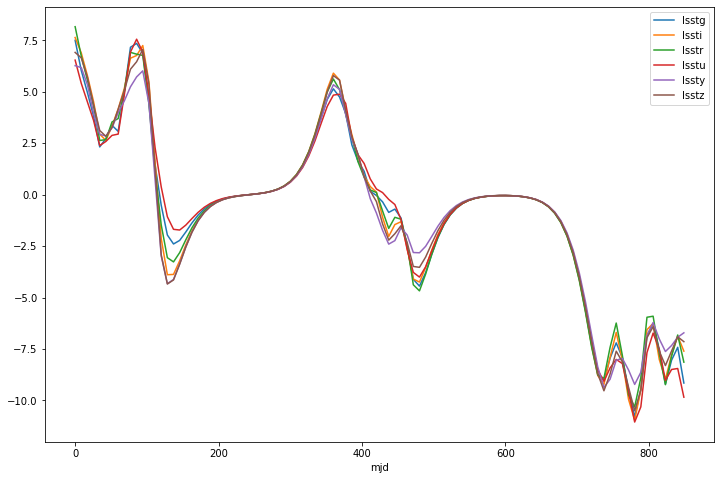

In [53]:
plot_single_object_gp_mean(df_combi_trimmed, 713)

In [49]:
def plot_supernova_type(supernova_type, df, cols):
    data = df[df["target"] == supernova_type][cols][:100]
    data.plot()

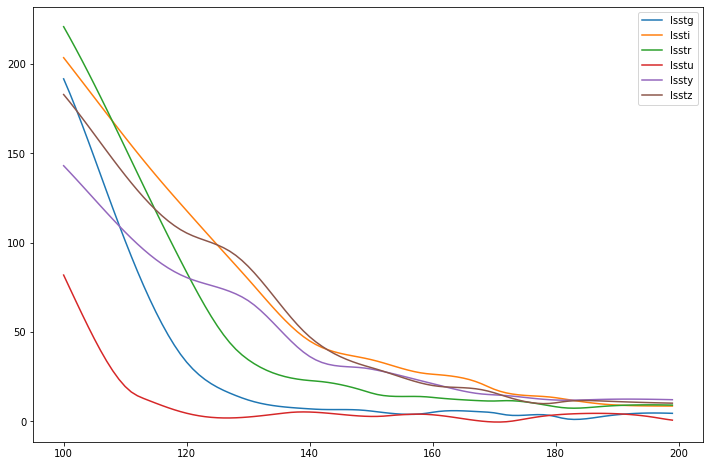

In [50]:
plot_supernova_type(90, df_combi_trimmed, filters)

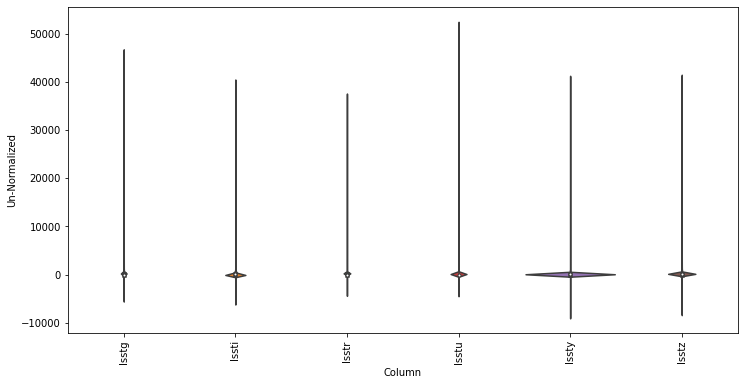

In [313]:
import seaborn as sns
df_dist = df_combi_trimmed[filters].melt(var_name='Column', value_name='Un-Normalized')

df_dist.dropna(inplace=True)
df_dist = df_dist.astype({'Un-Normalized': 'float'})

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Un-Normalized', data=df_dist)
_ = ax.set_xticklabels(df_combi_trimmed[filters].keys(), rotation=90)

In [314]:
from sklearn.preprocessing import RobustScaler

scale_columns = filters

scaler = RobustScaler()

scaler = scaler.fit(df_combi_trimmed[scale_columns])

df_combi_trimmed.loc[:, scale_columns] = scaler.transform(df_combi_trimmed[scale_columns].to_numpy())

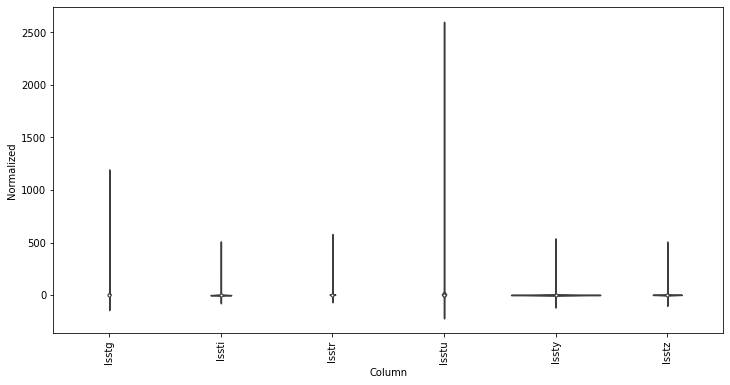

In [315]:
df_norm = df_combi_trimmed[filters].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_norm)
_ = ax.set_xticklabels(df_combi_trimmed[filters].keys(), rotation=90)

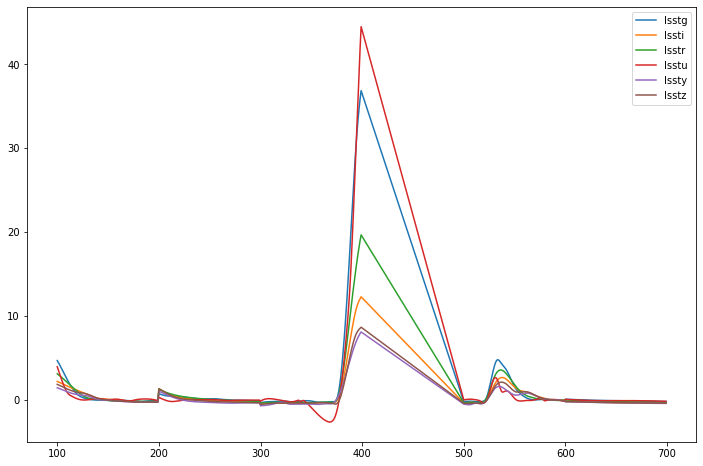

In [316]:
plot_supernova_type(90, df_combi_trimmed, filters)

In [369]:
from astronet.t2.utils import train_val_test_split, create_dataset
from astronet.t2.preprocess import robust_scale

In [358]:
df = df_combi.drop(
    columns=[
        "ra",
        "decl",
        "gal_l",
        "gal_b",
        "ddf",
        "hostgal_specz",
        "hostgal_photoz",
        "hostgal_photoz_err",
        "distmod",
        "mwebv",
    ]
)

In [359]:
df.head()

,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id,target
0,0,2.18802,32.4562,20.7741,-1.46022,43.7315,40.9185,730,42
1,1.21075,2.11177,32.1487,20.6293,-1.45037,43.3795,40.5765,730,42
2,2.4215,2.0408,31.8309,20.4779,-1.43743,43.0142,40.2223,730,42
3,3.63225,1.97394,31.502,20.3201,-1.42155,42.6357,39.8557,730,42
4,4.84299,1.91018,31.1608,20.1562,-1.40287,42.244,39.477,730,42


In [361]:
df_train, df_val, df_test, num_features = train_val_test_split(df, filters)

In [363]:
num_features

6

In [364]:
assert num_features == 6

In [365]:
cols = filters

In [366]:
robust_scale(df_train, df_val, df_test, cols)

In [371]:
TIME_STEPS = 20
STEP = 20

X_train, y_train = create_dataset(
    df_train[cols],
    df_train.target,
    TIME_STEPS,
    STEP
)

X_val, y_val = create_dataset(
    df_val[cols],
    df_val.target,
    TIME_STEPS,
    STEP
)

X_test, y_test = create_dataset(
    df_test[cols],
    df_test.target,
    TIME_STEPS,
    STEP
)

In [373]:
type(X_train)

numpy.ndarray

# Scratchpad below:

In [121]:
# data = data.loc[data.detected == 1]  # Update dataframe with only detected points

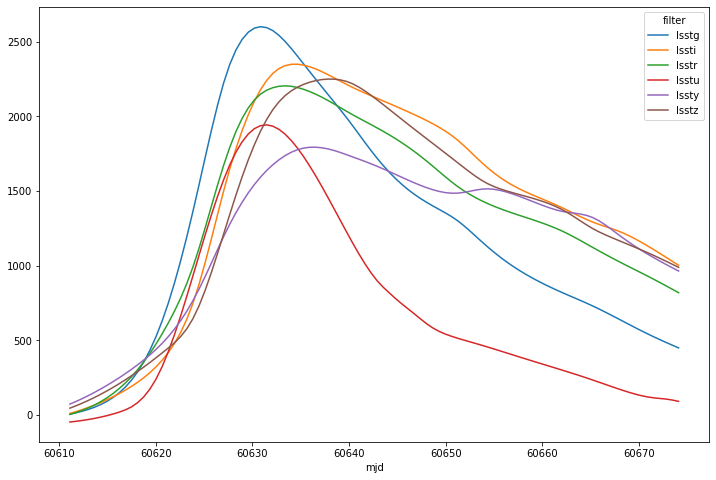

In [274]:
jj = pd.DataFrame(data=adf, columns=obj_gps.columns).drop(columns=['object_id'])
jj.set_index('mjd').plot();

In [258]:
obj_gps.reset_index()

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,60532.301900,13.920079,32.155142,21.046858,10.110353,44.070733,40.735444,730
1,60533.097594,13.857633,31.975777,20.929288,10.060757,43.892619,40.537964,730
2,60533.893288,13.794835,31.791269,20.811385,10.010689,43.709000,40.334172,730
3,60534.688982,13.731663,31.601240,20.693190,9.960139,43.519955,40.124121,730
4,60535.484676,13.668093,31.405309,20.574752,9.909095,43.325567,39.907867,730
...,...,...,...,...,...,...,...,...
95,60607.892824,3.083925,5.195206,3.529121,2.337295,16.778340,10.983845,730
96,60608.688518,2.928595,5.017554,3.309634,2.230361,16.519662,10.751077,730
97,60609.484212,2.773739,4.841027,3.090825,2.123512,16.263351,10.521220,730
98,60610.279906,2.619410,4.665649,2.873723,2.016775,16.009406,10.294221,730


In [216]:
full_df = pd.DataFrame(data=adf, columns=["mjd", "flux", "flux_error", "filter", "object_id"])
full_df['object_id'] = full_df['object_id'].astype(int)

In [217]:
len(np.unique(full_df['object_id']))

3990

In [218]:
full_df

,mjd,flux,flux_error,filter,object_id
0,60532.3,10.1104,10.8836,3685,730
1,60533.1,10.0608,10.8636,3685,730
2,60533.9,10.0107,10.8443,3685,730
3,60534.7,9.96014,10.8255,3685,730
4,60535.5,9.90909,10.8072,3685,730
...,...,...,...,...,...
2393995,60085.5,121.816,145.967,9736,130755807
2393996,60085.9,119.865,147.608,9736,130755807
2393997,60086.2,117.902,149.228,9736,130755807
2393998,60086.6,115.929,150.829,9736,130755807


In [221]:
full_df['filter'] = full_df['filter'].map(inverse_pb_wavelengths)
full_df

,mjd,flux,flux_error,filter,object_id
0,60532.3,10.1104,10.8836,lsstu,730
1,60533.1,10.0608,10.8636,lsstu,730
2,60533.9,10.0107,10.8443,lsstu,730
3,60534.7,9.96014,10.8255,lsstu,730
4,60535.5,9.90909,10.8072,lsstu,730
...,...,...,...,...,...
2393995,60085.5,121.816,145.967,lssty,130755807
2393996,60085.9,119.865,147.608,lssty,130755807
2393997,60086.2,117.902,149.228,lssty,130755807
2393998,60086.6,115.929,150.829,lssty,130755807


In [227]:
piv = full_df.pivot(index='mjd', columns='filter', values='flux')
piv.head()

ValueError: Index contains duplicate entries, cannot reshape

In [151]:
df = data[data['object_id'] == 745]

In [152]:
df.head()

,object_id,mjd,filter,flux,flux_error,detected
1157,745,60125.4094,lsstr,220.795212,1.492162,1
1158,745,60125.4171,lsstg,192.244293,1.432564,1
1159,745,60125.4248,lssti,203.250702,1.862000,1
1160,745,60125.4357,lsstz,183.633118,2.818825,1
1161,745,60125.4448,lssty,141.513290,11.663839,1


In [165]:
obj_gps.head()

,mjd,flux,flux_error,filter
0,60125.409400,85.239398,13.169184,lsstu
1,60126.658766,78.827047,12.062357,lsstu
2,60127.908131,72.413508,10.973103,lsstu
3,60129.157497,66.042017,9.900084,lsstu
4,60130.406863,59.760191,8.842291,lsstu


In [166]:
piv = obj_gps.pivot(index='mjd', columns='filter', values='flux')
piv['obj_id'] = 745
piv.head()

filter,lsstg,lssti,lsstr,lsstu,lssty,lsstz,obj_id
mjd,,,,,,,
60125.409400,191.804452,203.486435,220.839308,85.239398,142.699996,183.006312,745
60126.658766,184.756912,199.536666,215.394826,78.827047,139.428623,179.251691,745
60127.908131,177.327218,195.580718,209.812026,72.413508,136.113325,175.363131,745
60129.157497,169.588797,191.617705,204.099033,66.042017,132.763736,171.368904,745
60130.406863,161.611846,187.648345,198.265394,59.760191,129.390911,167.296101,745
